In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("practica_micro.csv")
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0


### PREPARACIÓN DE DATOS

In [3]:
# Crear la clase para cuando no pertenezca a ninguna
# df['Sin_Resistencia'] = np.where((df['Erythromycin'] == 0) & (df['Ciprofloxacin'] == 0), 1.0, 0.0)
df['Clase'] = np.where((df['Erythromycin'] == 1) & (df['Ciprofloxacin'] == 1), 3.0,
                       np.where((df['Erythromycin'] == 1), 1,
                                np.where((df['Ciprofloxacin'] == 1), 2, 0)))
df.head()

,MALDI_binned,Erythromycin,Ciprofloxacin,Clase
0,"[0.0002535866911222, 0.0003949856891622, 0.000...",0.0,0.0,0.0
1,"[0.0003393276603384, 0.0002025633325117, 9.727...",0.0,0.0,0.0
2,"[0.0001225308701019, 0.0001617988864636, 8.873...",1.0,0.0,1.0
3,"[0.0002821877594324, 0.0006081195988659, 0.000...",0.0,1.0,2.0
4,"[0.0003700831426878, 0.0002433899375037, 0.000...",0.0,0.0,0.0


In [4]:
# Miramos la estructura del dataset un poco
datos = eval(df.iloc[0]['MALDI_binned'])
print(len(datos))
print(np.max(datos))
print(np.min(datos))

6000
0.0156976407769727
0.0


In [5]:
# #Comprobamos que no hay ninguno que tenga diferente
# for i in range (len(df['MALDI_binned'])):
#   langitu = len(eval(df.iloc[i]['MALDI_binned']))
#   if(langitu != 6000):
#     print(i," --> ",langitu)
# #

# TODOS TIENEN 6000 PROTEINAS

## PREPROCESADO

### Separamos las proteinas en columnas

In [6]:
#Separamos las proteinas por columnas
maldi_data = df['MALDI_binned'].apply(lambda x: pd.Series(eval(x)))
maldi_data = maldi_data.add_prefix('Proteina_')
df = pd.concat([df, maldi_data], axis=1)
df = df.drop(columns=['MALDI_binned'])

#Vemos como queda
df.head()

,Erythromycin,Ciprofloxacin,Clase,Proteina_0,Proteina_1,Proteina_2,Proteina_3,Proteina_4,Proteina_5,Proteina_6,...,Proteina_5990,Proteina_5991,Proteina_5992,Proteina_5993,Proteina_5994,Proteina_5995,Proteina_5996,Proteina_5997,Proteina_5998,Proteina_5999
0,0.0,0.0,0.0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,0.001296,...,3.847418e-07,0.000005,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025
1,0.0,0.0,0.0,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,0.000974,...,6.344351e-05,0.000070,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022
2,1.0,0.0,1.0,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,0.001091,...,1.657958e-05,0.000006,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003
3,0.0,1.0,2.0,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,0.000414,...,4.959213e-05,0.000073,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096
4,0.0,0.0,0.0,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,0.000981,...,6.183159e-05,0.000086,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140


### Normalizar los datos

In [7]:
"""#Normalizamos los datos
for columna in df.columns[3:]:
  mean = np.mean(df[columna])
  std = np.std(df[columna])
  result = (df[columna] - mean) / std
  df[columna] = np.where(result < 1, 0, result)"""

df.head()

,Erythromycin,Ciprofloxacin,Clase,Proteina_0,Proteina_1,Proteina_2,Proteina_3,Proteina_4,Proteina_5,Proteina_6,...,Proteina_5990,Proteina_5991,Proteina_5992,Proteina_5993,Proteina_5994,Proteina_5995,Proteina_5996,Proteina_5997,Proteina_5998,Proteina_5999
0,0.0,0.0,0.0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,0.001296,...,3.847418e-07,0.000005,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025
1,0.0,0.0,0.0,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,0.000974,...,6.344351e-05,0.000070,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022
2,1.0,0.0,1.0,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,0.001091,...,1.657958e-05,0.000006,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003
3,0.0,1.0,2.0,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,0.000414,...,4.959213e-05,0.000073,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096
4,0.0,0.0,0.0,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,0.000981,...,6.183159e-05,0.000086,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140


### Dividir el conjunto

In [8]:
from sklearn.model_selection import train_test_split


#Dividimos los labels de los atributos
x = df.drop(columns=['Clase','Erythromycin','Ciprofloxacin'])
y = df[['Clase','Erythromycin','Ciprofloxacin']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


## Aplicar reducción de atributos

### PCA

In [9]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from imblearn.over_sampling import SMOTE

In [10]:
"""from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Applying PCA
# You can adjust n_components based on your requirement or use a variance threshold
# Aplicar LASSO para seleccionar las 500 columnas más importantes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(x_train, y_train['Clase'])

# Seleccionar las 5 características más importantes
model = SelectFromModel(lasso, max_features=5, prefit=True)
x_train_lasso = model.transform(x_train)
x_test_lasso = model.transform(x_test)

x_train_pca = x_train_lasso
x_test_pca = x_test_lasso
"""


"from sklearn.decomposition import PCA\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, classification_report\nfrom sklearn.linear_model import Lasso\nfrom sklearn.feature_selection import SelectFromModel\n\n# Applying PCA\n# You can adjust n_components based on your requirement or use a variance threshold\n# Aplicar LASSO para seleccionar las 500 columnas más importantes\nlasso = Lasso(alpha=0.01, random_state=42)\nlasso.fit(x_train, y_train['Clase'])\n\n# Seleccionar las 5 características más importantes\nmodel = SelectFromModel(lasso, max_features=5, prefit=True)\nx_train_lasso = model.transform(x_train)\nx_test_lasso = model.transform(x_test)\n\nx_train_pca = x_train_lasso\nx_test_pca = x_test_lasso\n"

# Clase de pruebas
Para probar con distintas modificaciones del dataset

In [11]:
# Importar accuracy_score, recall_score y roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

import torch

class Test_data_modifications():
    """En esta clase, se evalúa el modelo proporcionado empleando distintas técnicas de preprocesamiento de datos."""

    def __init__(self, modelo, x_train, x_test, x_val, y_val, y_train, y_test, auc=False):
        self.modelo = modelo
        self.x_train = x_train
        self.x_test = x_test
        self.x_val = x_val
        self.y_val = y_val
        self.y_train = y_train
        self.y_test = y_test
        self.datasets = None
        self.activate_auc = auc
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def aplicar_transformaciones(self, x_train, x_test, y_train, y_test):
        def threshold_transform(X):
            X = np.array(X)
            X[X < 0.00005] = 0
            return X

        x_train_threshold = threshold_transform(self.x_train)
        x_test_threshold = threshold_transform(self.x_test)

        x_train_mult = x_train_threshold * 100
        x_test_mult = x_test_threshold * 100

        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train_mult)
        x_test_scaled = scaler.transform(x_test_mult)

        pca = PCA(n_components=0.95)
        x_train_pca = pca.fit_transform(x_train_scaled)
        x_test_pca = pca.transform(x_test_scaled)

        lasso = Lasso(alpha=0.01).fit(x_train_scaled, y_train)
        selector = SelectFromModel(lasso, prefit=True)
        x_train_lasso = selector.transform(x_train_scaled)
        x_test_lasso = selector.transform(x_test_scaled)

        selector = SelectKBest(f_classif, k=50)
        x_train_selector = selector.fit_transform(x_train_scaled, y_train)
        x_test_selector = selector.transform(x_test_scaled)

        # Se aplica SMOTE a los datos
        smote = SMOTE()
        x_train_smote, y_train_smote_selector = smote.fit_resample(x_train_scaled, y_train)

        # Se aplican las transformaciones a los datos
        x_train_pca_smote = pca.fit_transform(x_train_scaled)
        x_train_pca_smote, y_train_smote_pca = smote.fit_resample(x_train_pca_smote, y_train)

        lasso_smote = Lasso(alpha=0.01).fit(x_train_scaled, y_train)
        selector_smote = SelectFromModel(lasso_smote, prefit=True)
        x_train_lasso_smote = selector_smote.transform(x_train_scaled)
        x_train_lasso_smote, y_train_smote_lasso = smote.fit_resample(x_train_lasso_smote, y_train)

        x_train_selector_smote = selector.fit_transform(x_train_smote, y_train_smote_selector)


        datasets = {
            'Selector': (x_train_selector, x_test_selector),
            'Original': (x_train_scaled, x_test_scaled),
            'PCA': (x_train_pca, x_test_pca),
            'Lasso': (x_train_lasso, x_test_lasso),
            'SMOTE': (x_train_smote, x_test_scaled, y_train_smote_selector),
            'PCA + SMOTE': (x_train_pca_smote, x_test_pca, y_train_smote_pca),
            'Lasso + SMOTE': (x_train_lasso_smote, x_test_lasso, y_train_smote_lasso),
            'Selector + SMOTE': (x_train_selector_smote, x_test_selector, y_train_smote_selector)
        }

        self.datasets = datasets

        return datasets


    def train_model(self, x_train, y_train, x_val, y_val):
        x_train = torch.tensor(x_train, dtype=torch.float32).to(self.device)
        y_train = torch.tensor(y_train.values, dtype=torch.float32).to(self.device)
        x_val = torch.tensor(x_val, dtype=torch.float32).to(self.device)
        y_val = torch.tensor(y_val.values, dtype=torch.float32).to(self.device)

        if hasattr(self.modelo, 'to'):
            self.modelo.to(self.device)
        self.modelo.fit(x_train.cpu().numpy(), y_train.cpu().numpy())
        y_pred = self.modelo.predict(x_val.cpu().numpy())
        y_pred = torch.tensor(y_pred, dtype=torch.float32).to(self.device)

        accuracy = accuracy_score(y_val.cpu(), y_pred.cpu())
        recall = recall_score(y_val.cpu(), y_pred.cpu(), average='macro')

        if self.activate_auc:
            y_pred_proba = self.modelo.predict_proba(x_val.cpu().numpy())[:, 1]
            auc = roc_auc_score(y_val.cpu(), y_pred_proba)
            return accuracy, recall, auc

        return accuracy, recall
    
    def test_model(self, x_test, y_test):
        y_pred = self.modelo.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')

        if self.activate_auc:
            y_pred_proba = self.modelo.predict_proba(x_test)[:, 1]
            auc = roc_auc_score(y_test, y_pred_proba)
            return accuracy, recall, auc

        return accuracy, recall
    
    def modify_and_test(self):

        best_dataset = None

        for dataset in self.datasets:
            
            if "SMOTE" in dataset:
                x_train_small, x_test_small, y_train_small = self.datasets[dataset]
                if self.activate_auc:
                    accuracy, recall, auc = self.train_model(x_train_small, y_train_small, x_test_small, self.y_test)
                else:
                    accuracy, recall = self.train_model(x_train_small, y_train_small, x_test_small, self.y_test)
            else:
                x_train_small, x_test_small = self.datasets[dataset]
                if self.activate_auc:
                    accuracy, recall, auc = self.train_model(x_train_small, self.y_train, x_test_small, self.y_test)
                    print(f"Accuracy for {dataset}: {accuracy}")
                    print(f"Recall for {dataset}: {recall}")
                    print(f"AUC for {dataset}: {auc}")
                    print("\n")
                else:
                    accuracy, recall = self.train_model(x_train_small, self.y_train, x_test_small, self.y_test)
                    print(f"Accuracy for {dataset}: {accuracy}")
                    print(f"Recall for {dataset}: {recall}")
                    print("\n")

            if best_dataset is None or recall > best_dataset[2]:
                if self.activate_auc:
                    best_dataset = (dataset, accuracy, recall, auc)
                else:
                    best_dataset = (dataset, accuracy, recall)

        print(f"Best dataset: {best_dataset[0]}")
        print(f"Accuracy: {best_dataset[1]}")
        print(f"Recall: {best_dataset[2]}")
        if self.activate_auc:
            print(f"AUC: {best_dataset[3]}")
        print("\n")

        return best_dataset

        


        

In [12]:
# Importar regresion logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=1234)

# Crear un objeto de la clase Test_data_modifications
test_clase = Test_data_modifications(lr, x_train, x_test, x_test, y_test['Clase'], y_train['Clase'], y_test['Clase'])

# Probar distintas transformaciones de los datos
test_clase.aplicar_transformaciones(x_train, x_test, y_train['Clase'], y_test['Clase'])

KeyboardInterrupt: 

In [ ]:
best_dataset_lr = test_clase.modify_and_test()

Accuracy for Selector: 0.7665706051873199
Recall for Selector: 0.3824426858682757


Accuracy for Original: 0.7550432276657061
Recall for Original: 0.33700238055954934


Accuracy for PCA: 0.7492795389048992
Recall for PCA: 0.33175218610790297


Accuracy for Lasso: 0.7204610951008645
Recall for Lasso: 0.3643640841916704


Best dataset: Lasso + SMOTE
Accuracy: 0.69164265129683
Recall: 0.4052814245645462




In [ ]:
# Probar con un modelo de random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1234)
test_clase.modelo = rf
best_dataset_rf = test_clase.modify_and_test()

Accuracy for Selector: 0.7665706051873199
Recall for Selector: 0.3205388078346336


Accuracy for Original: 0.7665706051873199
Recall for Original: 0.25


Accuracy for PCA: 0.7579250720461095
Recall for PCA: 0.2505509463313456


Accuracy for Lasso: 0.7665706051873199
Recall for Lasso: 0.25


Best dataset: Selector
Accuracy: 0.7665706051873199
Recall: 0.3205388078346336




In [ ]:
# Probar con un modelo de SVM
from sklearn.svm import SVC
svc = SVC(random_state=1234)
test_clase.modelo = svc
best_dataset_svc = test_clase.modify_and_test()

Accuracy for Selector: 0.7809798270893372
Recall for Selector: 0.2850337049520353


Accuracy for Original: 0.7665706051873199
Recall for Original: 0.25


Accuracy for PCA: 0.7665706051873199
Recall for PCA: 0.25


Accuracy for Lasso: 0.7665706051873199
Recall for Lasso: 0.25




: 

: 

In [ ]:
# Probar con xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1234)
test_clase.modelo = xgb
best_dataset_xgb = test_clase.modify_and_test()

Accuracy for Selector: 0.7694524495677233
Recall for Selector: 0.3582246171855972


Accuracy for Original: 0.7867435158501441
Recall for Original: 0.2835429089966295


Accuracy for PCA: 0.7665706051873199
Recall for PCA: 0.25


Accuracy for Lasso: 0.7838616714697406
Recall for Lasso: 0.28934404977962147


Best dataset: Selector
Accuracy: 0.7694524495677233
Recall: 0.3582246171855972




In [ ]:
# Probar con un modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
test_clase.modelo = knn
best_dataset_knn = test_clase.modify_and_test()

Accuracy for Selector: 0.7723342939481268
Recall for Selector: 0.3576879110000707


Accuracy for Original: 0.7406340057636888
Recall for Original: 0.2583938294010889


Accuracy for PCA: 0.7377521613832853
Recall for PCA: 0.24397199896292457


Accuracy for Lasso: 0.7694524495677233
Recall for Lasso: 0.3046261814410635


Best dataset: Lasso + SMOTE
Accuracy: 0.17002881844380405
Recall: 0.4655142951422443




# Erythromycin

In [ ]:
# Importar regresion logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=1234)

# Crear un objeto de la clase Test_data_modifications
test_ery = Test_data_modifications(lr, x_train, x_test, x_test, y_test['Erythromycin'], y_train['Erythromycin'], y_test['Erythromycin'], True)

# Probar distintas transformaciones de los datos
test_ery.aplicar_transformaciones(x_train, x_test, y_train['Erythromycin'], y_test['Erythromycin'])

{'Selector': (array([[ 1.11437295,  0.87823647,  2.22682276, ...,  0.47484747,
          -0.7787299 ,  0.75953443],
         [-0.90402576, -0.15668512, -0.19214591, ...,  0.30293982,
          -0.7787299 , -0.78253421],
         [ 0.00459517,  0.06440968,  0.15085291, ...,  0.07003616,
          -0.7787299 ,  0.42659746],
         ...,
         [-0.14264075, -0.45020858, -0.83646722, ..., -0.31491645,
          -0.7787299 , -0.78253421],
         [ 0.90974384, -0.2084829 ,  1.25032697, ...,  2.08335885,
          -0.7787299 , -0.78253421],
         [ 0.52694908, -0.71302233, -0.49113057, ..., -1.0104599 ,
           0.86840494,  1.32398729]]),
  array([[-0.72366034, -0.71793767, -0.92467298, ...,  0.73922212,
           2.13685791, -0.78253421],
         [ 0.23701457,  0.15348612, -0.0582993 , ..., -0.01344205,
          -0.7787299 , -0.78253421],
         [-0.0514595 , -0.65256078, -0.26947244, ..., -0.31043229,
          -0.7787299 , -0.78253421],
         ...,
         [ 2.01765199,

In [ ]:
test_ery.modify_and_test()

Accuracy for Selector: 0.7982708933717579
Recall for Selector: 0.585366489417162
AUC for Selector: 0.6578041914294651


Accuracy for Original: 0.7809798270893372
Recall for Original: 0.6072620164737774
AUC for Original: 0.707694713794182


Accuracy for PCA: 0.8011527377521613
Recall for PCA: 0.6035084975497862
AUC for PCA: 0.714054843082056


Accuracy for Lasso: 0.7867435158501441
Recall for Lasso: 0.6217547700969659
AUC for Lasso: 0.6803774371806903


Best dataset: SMOTE
Accuracy: 0.7809798270893372
Recall: 0.6236054634553228
AUC: 0.7041497236993014




('SMOTE', 0.7809798270893372, 0.6236054634553228, 0.7041497236993014)

In [ ]:
# Probar con un modelo de random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1234)
test_ery.modelo = rf
best_dataset_rf = test_ery.modify_and_test()

Accuracy for Selector: 0.8270893371757925
Recall for Selector: 0.5924564696069232
AUC for Selector: 0.689031383588781


Accuracy for Original: 0.8040345821325648
Recall for Original: 0.5126941924721092
AUC for Original: 0.6586904389531852


Accuracy for PCA: 0.7953890489913544
Recall for PCA: 0.5018506933583567
AUC for PCA: 0.5172818267125431


Accuracy for Lasso: 0.8011527377521613
Recall for Lasso: 0.5054478156605151
AUC for Lasso: 0.6698727974142424


Best dataset: Selector
Accuracy: 0.8270893371757925
Recall: 0.5924564696069232
AUC: 0.689031383588781




In [ ]:
# Probar con un modelo de SVM
from sklearn.svm import SVC
svc = SVC(random_state=1234)
test_ery.modelo = svc
best_dataset_svc = test_ery.modify_and_test()

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
# Probar con xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1234)
test_ery.modelo = xgb
best_dataset_xgb = test_ery.modify_and_test()

Accuracy for Original: 0.8069164265129684
Recall for Original: 0.5417318319257638


Accuracy for PCA: 0.7982708933717579
Recall for PCA: 0.4982014388489209


Accuracy for Lasso: 0.8040345821325648
Recall for Lasso: 0.5453810864351997


Accuracy for Selector: 0.7809798270893372
Recall for Selector: 0.5745751225106871


Accuracy for SMOTE: 0.8011527377521613
Recall for SMOTE: 0.5435825252841205


Accuracy for PCA + SMOTE: 0.7463976945244957
Recall for PCA + SMOTE: 0.5802314670003128


Accuracy for Lasso + SMOTE: 0.8040345821325648
Recall for Lasso + SMOTE: 0.5508289020957147


Accuracy for Selector + SMOTE: 0.38904899135446686
Recall for Selector + SMOTE: 0.5097487227609218


Best dataset: PCA + SMOTE
Accuracy: 0.7463976945244957
Recall: 0.5802314670003128




In [ ]:
# Probar con un modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
test_ery.modelo = knn
best_dataset_knn = test_ery.modify_and_test()

Accuracy for Original: 0.7665706051873199
Recall for Original: 0.5165519758106558


Accuracy for PCA: 0.7665706051873199
Recall for PCA: 0.5056563444896257


Accuracy for Lasso: 0.8069164265129684
Recall for Lasso: 0.563523094567824


Accuracy for Selector: 0.8011527377521613
Recall for Selector: 0.5708216035866959


Accuracy for SMOTE: 0.2276657060518732
Recall for SMOTE: 0.5125377958502764


Accuracy for PCA + SMOTE: 0.2334293948126801
Recall for PCA + SMOTE: 0.5161349181524346


Accuracy for Lasso + SMOTE: 0.21902017291066284
Recall for Lasso + SMOTE: 0.49624648107600877


Accuracy for Selector + SMOTE: 0.37175792507204614
Recall for Selector + SMOTE: 0.4989573558544469


Best dataset: Selector
Accuracy: 0.8011527377521613
Recall: 0.5708216035866959




# Ciprofloxacin

In [ ]:
# Importar regresion logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=1234)

# Crear un objeto de la clase Test_data_modifications
test_cipro = Test_data_modifications(lr, x_train, x_test, x_test, y_test['Ciprofloxacin'], y_train['Ciprofloxacin'], y_test['Ciprofloxacin'], True)

# Probar distintas transformaciones de los datos
test_cipro.aplicar_transformaciones(x_train, x_test, y_train['Ciprofloxacin'], y_test['Ciprofloxacin'])

{'Selector': (array([[-0.0369365 ,  0.29821095, -0.46534001, ...,  0.31297737,
           1.46663954,  0.16973102],
         [-0.14513141,  0.04470614,  0.9849981 , ..., -0.22058174,
           0.61114377, -0.89178854],
         [-0.58207917, -0.44969616,  0.52431835, ...,  0.2603564 ,
           0.15018303, -0.89178854],
         ...,
         [ 0.0360982 , -0.19799185,  2.02705333, ...,  0.95177689,
           1.68213883,  0.12686458],
         [ 2.24318754, -0.43776688,  1.57496251, ...,  0.00574292,
          -0.86989639, -0.89178854],
         [ 0.52377756, -0.3127209 ,  1.37165211, ..., -0.59143902,
          -0.33406349,  0.13708292]]),
  array([[-4.66642815e-01, -2.63885179e-01, -1.07360112e+00, ...,
          -1.01206517e+00, -5.70834148e-01,  8.80329693e-01],
         [ 3.73607102e-01, -7.28104151e-01, -2.97176149e-03, ...,
          -4.34576069e-01, -7.47352571e-01, -8.91788540e-01],
         [-8.83693076e-01, -5.09560261e-01,  3.58983676e+00, ...,
          -6.17428983e-01,

In [ ]:
test_cipro.modify_and_test()

Accuracy for Original: 0.9337175792507204
Recall for Original: 0.600979602791197
AUC for Original: 0.7925389157273215


Accuracy for PCA: 0.9250720461095101
Recall for PCA: 0.5559581320450886
AUC for PCA: 0.7898550724637682


Accuracy for Lasso: 0.9077809798270894
Recall for Lasso: 0.5668947933440687
AUC for Lasso: 0.7576489533011272


Accuracy for Selector: 0.9279538904899135
Recall for Selector: 0.5776972624798712
AUC for Selector: 0.7485238862050456


Best dataset: PCA + SMOTE
Accuracy: 0.9221902017291066
Recall: 0.6150026838432635
AUC: 0.7901234567901234




('PCA + SMOTE', 0.9221902017291066, 0.6150026838432635, 0.7901234567901234)

In [ ]:
# Probar con un modelo de random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1234)
test_cipro.modelo = rf
best_dataset_rf = test_cipro.modify_and_test()

Accuracy for Original: 0.9337175792507204
Recall for Original: 0.5


Accuracy for PCA: 0.9279538904899135
Recall for PCA: 0.49691358024691357


Accuracy for Lasso: 0.9365994236311239
Recall for Lasso: 0.541935050993022


Accuracy for Selector: 0.9394812680115274
Recall for Selector: 0.6040660225442834


Accuracy for SMOTE: 0.9337175792507204
Recall for SMOTE: 0.5


Accuracy for PCA + SMOTE: 0.9164265129682997
Recall for PCA + SMOTE: 0.5109366612989802


Accuracy for Lasso + SMOTE: 0.9337175792507204
Recall for Lasso + SMOTE: 0.5


Accuracy for Selector + SMOTE: 0.8472622478386167
Recall for Selector + SMOTE: 0.5344873859366612


Best dataset: Selector
Accuracy: 0.9394812680115274
Recall: 0.6040660225442834




In [ ]:
# Probar con un modelo de SVM
from sklearn.svm import SVC
svc = SVC(random_state=1234)
test_cipro.modelo = svc
best_dataset_svc = test_cipro.modify_and_test()

Accuracy for Original: 0.9337175792507204
Recall for Original: 0.5


Accuracy for PCA: 0.9337175792507204
Recall for PCA: 0.5


Accuracy for Lasso: 0.9250720461095101
Recall for Lasso: 0.49537037037037035


Accuracy for Selector: 0.930835734870317
Recall for Selector: 0.4984567901234568


Accuracy for SMOTE: 0.9337175792507204
Recall for SMOTE: 0.5


Accuracy for PCA + SMOTE: 0.9423631123919308
Recall for PCA + SMOTE: 0.6056092324208266


Accuracy for Lasso + SMOTE: 0.9221902017291066
Recall for Lasso + SMOTE: 0.534219001610306


Accuracy for Selector + SMOTE: 0.829971181556196
Recall for Selector + SMOTE: 0.525228126677402


Best dataset: PCA + SMOTE
Accuracy: 0.9423631123919308
Recall: 0.6056092324208266




In [ ]:
# Probar con xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1234)
test_cipro.modelo = xgb
best_dataset_xgb = test_cipro.modify_and_test()

Accuracy for Original: 0.9365994236311239
Recall for Original: 0.5217391304347826


Accuracy for PCA: 0.9337175792507204
Recall for PCA: 0.5


Accuracy for Lasso: 0.9279538904899135
Recall for Lasso: 0.49691358024691357


Accuracy for Selector: 0.9365994236311239
Recall for Selector: 0.5621309715512613


Accuracy for SMOTE: 0.9337175792507204
Recall for SMOTE: 0.5


Accuracy for PCA + SMOTE: 0.9221902017291066
Recall for PCA + SMOTE: 0.534219001610306


Accuracy for Lasso + SMOTE: 0.9337175792507204
Recall for Lasso + SMOTE: 0.5201959205582394


Accuracy for Selector + SMOTE: 0.7550432276657061
Recall for Selector + SMOTE: 0.5658883521202362


Best dataset: Selector + SMOTE
Accuracy: 0.7550432276657061
Recall: 0.5658883521202362




In [ ]:
# Probar con un modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
test_cipro.modelo = knn
best_dataset_knn = test_cipro.modify_and_test()

Accuracy for Original: 0.9337175792507204
Recall for Original: 0.5


Accuracy for PCA: 0.9337175792507204
Recall for PCA: 0.5


Accuracy for Lasso: 0.930835734870317
Recall for Lasso: 0.5388486312399355


Accuracy for Selector: 0.9365994236311239
Recall for Selector: 0.5823268921095008


Accuracy for SMOTE: 0.12103746397694524
Recall for SMOTE: 0.529320987654321


Accuracy for PCA + SMOTE: 0.138328530259366
Recall for PCA + SMOTE: 0.5385802469135802


Accuracy for Lasso + SMOTE: 0.1930835734870317
Recall for Lasso + SMOTE: 0.5477053140096618


Accuracy for Selector + SMOTE: 0.6282420749279539
Recall for Selector + SMOTE: 0.5383789586688137


Best dataset: Selector
Accuracy: 0.9365994236311239
Recall: 0.5823268921095008




# Modelos avanzados

In [ ]:
# Empleando un MLP simple
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1234)
test_clase.modelo = mlp
test_ery.modelo = mlp
test_cipro.modelo = mlp
best_dataset_mlp_clase = test_clase.modify_and_test()


Accuracy for Original: 0.7579250720461095
Recall for Original: 0.32783074457303135


Accuracy for PCA: 0.7262247838616714
Recall for PCA: 0.36254380072438147


Accuracy for Lasso: 0.7262247838616714
Recall for Lasso: 0.3542383584352731




C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for Selector: 0.7579250720461095
Recall for Selector: 0.40511054281471703


Best dataset: Selector
Accuracy: 0.7579250720461095
Recall: 0.40511054281471703




C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_dataset_mlp_ery = test_ery.modify_and_test()

Accuracy for Original: 0.8011527377521613
Recall for Original: 0.5871650505682411
AUC for Original: 0.699979147117089


Accuracy for PCA: 0.7953890489913544
Recall for PCA: 0.5944635595871129
AUC for PCA: 0.6880930038577833


Accuracy for Lasso: 0.7982708933717579
Recall for Lasso: 0.6180533833802523
AUC for Lasso: 0.698310916484204




C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for Selector: 0.8011527377521613
Recall for Selector: 0.6525388384944218
AUC for Selector: 0.7226045250755917


Best dataset: Selector
Accuracy: 0.8011527377521613
Recall: 0.6525388384944218
AUC: 0.7226045250755917




C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_dataset_mlp_cipro = test_cipro.modify_and_test()

Accuracy for Original: 0.9221902017291066
Recall for Original: 0.534219001610306
AUC for Original: 0.7459742351046699


Accuracy for PCA: 0.9365994236311239
Recall for PCA: 0.5823268921095008
AUC for PCA: 0.7791196994095544


Accuracy for Lasso: 0.9048991354466859
Recall for Lasso: 0.5249597423510467
AUC for Lasso: 0.7156468062265163




C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for Selector: 0.930835734870317
Recall for Selector: 0.6398282340311325
AUC for Selector: 0.7635534084809447


Best dataset: Selector
Accuracy: 0.930835734870317
Recall: 0.6398282340311325
AUC: 0.7635534084809447




In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción del modelo MLP para Erythromycin
y_pred_proba_mlp_ery = mlp.predict_proba(x_test_pca)

# Calcular la curva ROC y el AUC para Erythromycin
fpr_ery, tpr_ery, _ = roc_curve(y_test['Erythromycin'], y_pred_proba_mlp_ery[:, 1])
roc_auc_ery = roc_auc_score(y_test['Erythromycin'], y_pred_proba_mlp_ery[:, 1])

# Obtener las probabilidades de predicción del modelo MLP para Ciprofloxacin
mlp.eval()
with torch.no_grad():
y_pred_proba_mlp_cipro = mlp.predict_proba(x_test_pca)
fpr_cipro, tpr_cipro, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_proba_mlp_cipro[:, 1])
roc_auc_cipro = roc_auc_score(y_test['Ciprofloxacin'], y_pred_proba_mlp_cipro[:, 1])

# Plotear la curva ROC
plt.figure()
plt.plot(fpr_ery, tpr_ery, label=f'Erythromycin (AUC = {roc_auc_ery:.2f})')
plt.plot(fpr_cipro, tpr_cipro, label=f'Ciprofloxacin (AUC = {roc_auc_cipro:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo MLP')
plt.legend(loc='lower right')
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'eval'

In [ ]:
from sklearn.metrics import roc_auc_score

# Obtener las probabilidades de predicción del modelo MLP
mlp.eval()
with torch.no_grad():
    y_pred_proba_mlp = mlp(torch.tensor(x_test_pca, dtype=torch.float32)).detach().numpy()

# Calcular el AUC para cada clase
auc_scores = {}
for i in range(y_pred_proba_mlp.shape[1]):
    auc_scores[i] = roc_auc_score(y_test['Clase'] == i, y_pred_proba_mlp[:, i])

# Imprimir los AUC para cada clase
for clase, auc in auc_scores.items():
    print(f"AUC para la clase {clase}: {auc:.4f}")

AttributeError: 'MLPClassifier' object has no attribute 'eval'

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

import torch.nn as nn
import torchvision.models as models
from sklearn.feature_selection import SelectKBest, f_classif

class ResNet50Classifier(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Classifier, self).__init__()
        self.resnet50 = models.resnet50(pretrained=True)
        self.resnet50.fc = nn.Linear(self.resnet50.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet50(x)

    def fit(self, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.001):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)

        x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)

        train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        for epoch in range(epochs):
            self.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train, y_train['Clase'])
x_test_selected = selector.transform(x_test)

# Calculate the correct shape
num_samples_train = x_train_selected.shape[0]
num_samples_test = x_test_selected.shape[0]

# Assuming the number of channels is 1 for grayscale images
num_channels = 1
height = 50
width = x_train_selected.shape[1] // height

# Convertir los datos de entrada a un formato adecuado para ResNet50
x_train_resnet = x_train_selected.reshape(num_samples_train, num_channels, height, width)
x_test_resnet = x_test_selected.reshape(num_samples_test, num_channels, height, width)

# Repeat the single channel data three times to create a 3-channel input
x_train_resnet = np.repeat(x_train_resnet, 3, axis=1)
x_test_resnet = np.repeat(x_test_resnet, 3, axis=1)

# Crear y entrenar el modelo ResNet50
resnet50_model = ResNet50Classifier(num_classes=4)
resnet50_model.fit(x_train_resnet, y_train['Clase'].values, epochs=10, batch_size=32, learning_rate=0.001)

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.9647605486891486
Epoch 2/10, Loss: 0.7382551384243098
Epoch 3/10, Loss: 0.6656176420775327
Epoch 4/10, Loss: 0.6738913438536904
Epoch 5/10, Loss: 0.6585688157515093
Epoch 6/10, Loss: 0.6583982110023499
Epoch 7/10, Loss: 0.6240818724036217
Epoch 8/10, Loss: 0.5884595371105454
Epoch 9/10, Loss: 0.5817529931664467
Epoch 10/10, Loss: 0.5446743003346703


In [ ]:
from sklearn.metrics import classification_report

# Hacer predicciones con el modelo ResNet
y_pred_resnet = resnet50_model(torch.tensor(x_test_resnet, dtype=torch.float32)).detach().numpy()
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

# Generar el reporte de clasificación
print(classification_report(y_test['Clase'], y_pred_resnet))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       266
         1.0       0.58      0.24      0.34        58
         2.0       1.00      0.17      0.29        12
         3.0       0.50      0.18      0.27        11

    accuracy                           0.78       347
   macro avg       0.72      0.39      0.44       347
weighted avg       0.76      0.78      0.74       347



## Erythromycin

In [ ]:
# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train, y_train['Erythromycin'])
x_test_selected = selector.transform(x_test)

# Calculate the correct shape
num_samples_train = x_train_selected.shape[0]
num_samples_test = x_test_selected.shape[0]

# Assuming the number of channels is 1 for grayscale images
num_channels = 1
height = 50
width = x_train_selected.shape[1] // height

# Convertir los datos de entrada a un formato adecuado para ResNet50
x_train_resnet = x_train_selected.reshape(num_samples_train, num_channels, height, width)
x_test_resnet = x_test_selected.reshape(num_samples_test, num_channels, height, width)

# Repeat the single channel data three times to create a 3-channel input
x_train_resnet = np.repeat(x_train_resnet, 3, axis=1)
x_test_resnet = np.repeat(x_test_resnet, 3, axis=1)

# Crear y entrenar el modelo ResNet50
resnet50_model = ResNet50Classifier(num_classes=2)
resnet50_model.fit(x_train_resnet, y_train['Erythromycin'].values, epochs=10, batch_size=32, learning_rate=0.001)

NameError: name 'ResNet50Classifier' is not defined

In [ ]:
# Hacer predicciones con el modelo ResNet
y_pred_resnet = resnet50_model(torch.tensor(x_test_resnet, dtype=torch.float32)).detach().numpy()
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

# Generar el reporte de clasificación
print(classification_report(y_test['Erythromycin'], y_pred_resnet))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.88       278
         1.0       0.50      0.26      0.34        69

    accuracy                           0.80       347
   macro avg       0.67      0.60      0.61       347
weighted avg       0.77      0.80      0.78       347



Mean Accuracy: 0.8847
Mean Recall: 0.6555
Mean AUC: 0.7791


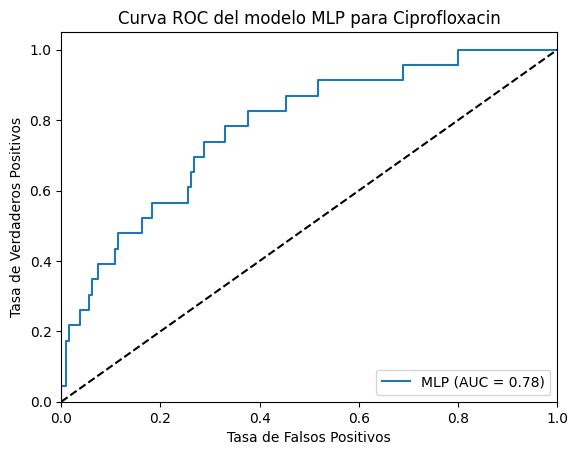

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

def threshold_transform(X):
    X = np.array(X)
    X[X < 0.00005] = 0
    return X


def train_and_evaluate(x_train, y_train, x_test, y_test, iterations=10, threshold=0.1):
    accuracies = []
    recalls = []
    aucs = []

    for _ in range(iterations):
        x_train_threshold = threshold_transform(x_train)
        x_test_threshold = threshold_transform(x_test)

        x_train_mult = x_train_threshold * 100
        x_test_mult = x_test_threshold * 100

        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train_mult)
        x_test_scaled = scaler.transform(x_test_mult)

        """selector = SelectKBest(f_classif, k=50)
        x_train_pca = selector.fit_transform(x_train_scaled, y_train)
        x_test_pca = selector.transform(x_test_scaled)"""

        pca = PCA(n_components=0.95)
        x_train_pca = pca.fit_transform(x_train_scaled)
        x_test_pca = pca.transform(x_test_scaled)

        # Entrenar el modelo MLP
        mlp = MLPClassifier(random_state=1234)
        mlp.fit(x_train_pca, y_train)

        # Predecir las probabilidades en el conjunto de prueba
        y_pred_proba_mlp = mlp.predict_proba(x_test_pca)[:, 1]

        # Calcular la curva ROC y el AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_mlp)
        roc_auc = roc_auc_score(y_test, y_pred_proba_mlp)
        aucs.append(roc_auc)

        # Aplicar un umbral para convertir las probabilidades en predicciones binarias
        y_pred_mlp = (y_pred_proba_mlp >= threshold).astype(int)
        report = classification_report(y_test, y_pred_mlp, output_dict=True)
        accuracies.append(report['accuracy'])
        recalls.append(report['macro avg']['recall'])

    mean_accuracy = np.mean(accuracies)
    mean_recall = np.mean(recalls)
    mean_auc = np.mean(aucs)

    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean AUC: {mean_auc:.4f}")

    # Plotear la curva ROC de la última iteración
    plt.figure()
    plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC del modelo MLP para Ciprofloxacin')
    plt.legend(loc='lower right')
    plt.show()

# Llamar a la función con los datos y el número de iteraciones deseado
train_and_evaluate(x_train, y_train['Ciprofloxacin'], x_test, y_test['Ciprofloxacin'], iterations=10, threshold=0.1)

Mean Accuracy: 0.7983
Mean Recall: 0.6616
Mean AUC: 0.6983


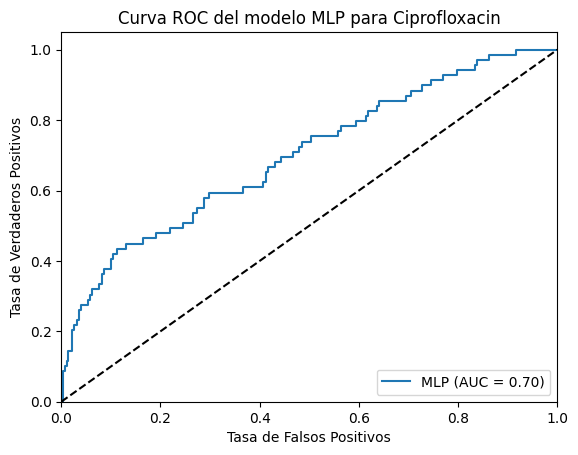

In [ ]:
train_and_evaluate(x_train, y_train['Erythromycin'], x_test, y_test['Erythromycin'], iterations=10, threshold=0.1)

# Explicabilidad MLP

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
PermutationExplainer explainer: 348it [00:10,  3.36s/it]                 


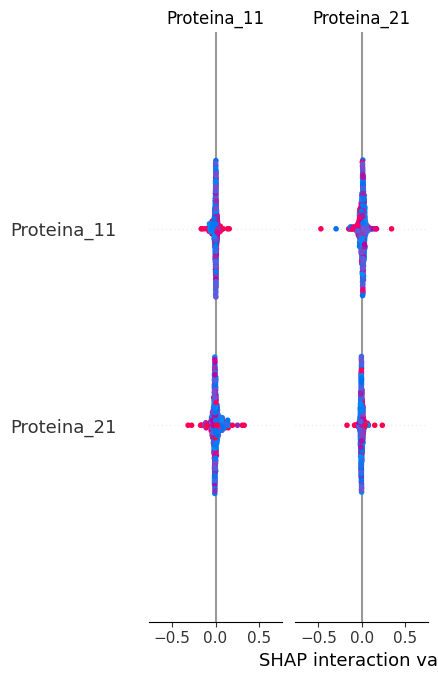

In [48]:
import shap
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Crear el pipeline con StandardScaler, SelectKBest y MLPClassifier
def threshold_transform(X):
    X = np.array(X)
    X[X < 0.00005] = 0
    return X

def multiply_transform(X):
    return X * 100

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest(f_classif, k=50)),
    ('mlp', MLPClassifier(random_state=1234))
])

# Aplicar las transformaciones antes de la pipeline
x_train_threshold = threshold_transform(x_train)
x_test_threshold = threshold_transform(x_test)

x_train_mult = multiply_transform(x_train_threshold)
x_test_mult = multiply_transform(x_test_threshold)

# Entrenar el modelo
pipeline.fit(x_train_mult, y_train['Erythromycin'])

# Crear una función de predicción para el modelo
def model_predict(data):
    return pipeline.named_steps['mlp'].predict_proba(data)

# Crear un objeto SHAP explainer
explainer = shap.Explainer(model_predict, pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_train_mult)))

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer(pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_test_mult)))

# Convertir x_train_mult a un DataFrame para obtener los nombres de las características
x_train_mult_df = pd.DataFrame(x_train_mult, columns=x_train.columns)

# Obtener los nombres de las características seleccionadas
feature_names = x_train_mult_df.columns[pipeline.named_steps['selectkbest'].get_support()]

# Crear un resumen de los valores SHAP
shap.summary_plot(shap_values, feature_names=feature_names)

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       278
         1.0       0.45      0.38      0.41        69

    accuracy                           0.78       347
   macro avg       0.65      0.63      0.64       347
weighted avg       0.77      0.78      0.78       347



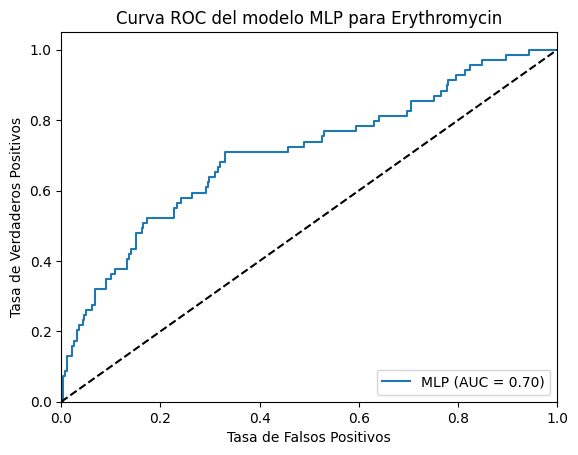

In [ ]:
import lime
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import lime.lime_tabular

# Crear el pipeline con StandardScaler, SelectKBest y MLPClassifier
# Aplicar las transformaciones antes del escalado
x_train_threshold = threshold_transform(x_train)
x_test_threshold = threshold_transform(x_test)

x_train_mult = x_train_threshold * 100
x_test_mult = x_test_threshold * 100

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selectkbest', SelectKBest(f_classif, k=50)),
    ('mlp', MLPClassifier(random_state=1234))
])

# Entrenar el modelo
pipeline.fit(x_train_mult, y_train['Erythromycin'])

# Crear un objeto LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_train)),
    feature_names=x_train.columns[pipeline.named_steps['selectkbest'].get_support()],
    class_names=['Clase 0', 'Clase 1'],
    mode='classification'
)

# Seleccionar una muestra del conjunto de prueba para explicar
sample_index = 0
sample = pipeline.named_steps['selectkbest'].transform(pipeline.named_steps['scaler'].transform(x_test_mult[sample_index:sample_index+1]))

# Generar la explicación para la muestra seleccionada
exp = explainer.explain_instance(
    data_row=sample[0],
    predict_fn=pipeline.named_steps['mlp'].predict_proba
)

# Mostrar la explicación
exp.show_in_notebook(show_table=True)

# Predecir en el conjunto de prueba
y_pred = pipeline.predict(x_test_mult)
y_pred_proba = pipeline.predict_proba(x_test_mult)[:, 1]

# Generar el reporte de clasificación
print(classification_report(y_test['Erythromycin'], y_pred))

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test['Erythromycin'], y_pred_proba)
roc_auc = roc_auc_score(y_test['Erythromycin'], y_pred_proba)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo MLP para Erythromycin')
plt.legend(loc='lower right')
plt.show()


## Ciprofloxacin

In [ ]:
# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train, y_train['Ciprofloxacin'])
x_test_selected = selector.transform(x_test)

# Calculate the correct shape
num_samples_train = x_train_selected.shape[0]
num_samples_test = x_test_selected.shape[0]

# Assuming the number of channels is 1 for grayscale images
num_channels = 1
height = 50
width = x_train_selected.shape[1] // height

# Convertir los datos de entrada a un formato adecuado para ResNet50
x_train_resnet = x_train_selected.reshape(num_samples_train, num_channels, height, width)
x_test_resnet = x_test_selected.reshape(num_samples_test, num_channels, height, width)

# Repeat the single channel data three times to create a 3-channel input
x_train_resnet = np.repeat(x_train_resnet, 3, axis=1)
x_test_resnet = np.repeat(x_test_resnet, 3, axis=1)

# Crear y entrenar el modelo ResNet50
resnet50_model = ResNet50Classifier(num_classes=2)
resnet50_model.fit(x_train_resnet, y_train['Ciprofloxacin'].values, epochs=10, batch_size=32, learning_rate=0.001)

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.3247203068299727
Epoch 2/10, Loss: 0.22739004927941345
Epoch 3/10, Loss: 0.2830248230390928
Epoch 4/10, Loss: 0.27442451168529014
Epoch 5/10, Loss: 0.2720727145841176
Epoch 6/10, Loss: 0.24728085142983633
Epoch 7/10, Loss: 0.21840671369467268
Epoch 8/10, Loss: 0.24648147812959822
Epoch 9/10, Loss: 0.2281879952008074
Epoch 10/10, Loss: 0.20081312395632267


In [ ]:
# Hacer predicciones con el modelo ResNet
y_pred_resnet = resnet50_model(torch.tensor(x_test_resnet, dtype=torch.float32)).detach().numpy()
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

# Generar el reporte de clasificación
print(classification_report(y_test['Ciprofloxacin'], y_pred_resnet))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       324
         1.0       0.56      0.22      0.31        23

    accuracy                           0.94       347
   macro avg       0.75      0.60      0.64       347
weighted avg       0.92      0.94      0.92       347



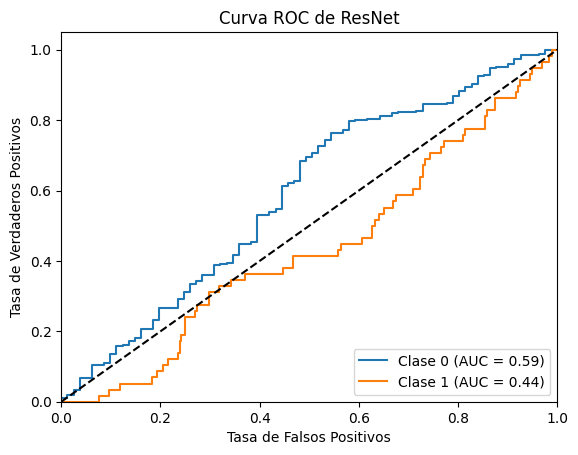

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción del modelo ResNet
y_pred_resnet_proba = resnet50_model(torch.tensor(x_test_resnet, dtype=torch.float32)).detach().numpy()

# Calcular la curva ROC y el AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_pred_resnet_proba.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test['Clase'] == i, y_pred_resnet_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test['Clase'] == i, y_pred_resnet_proba[:, i])

# Plotear la curva ROC para cada clase
plt.figure()
for i in range(y_pred_resnet_proba.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de ResNet')
plt.legend(loc='lower right')
plt.show()

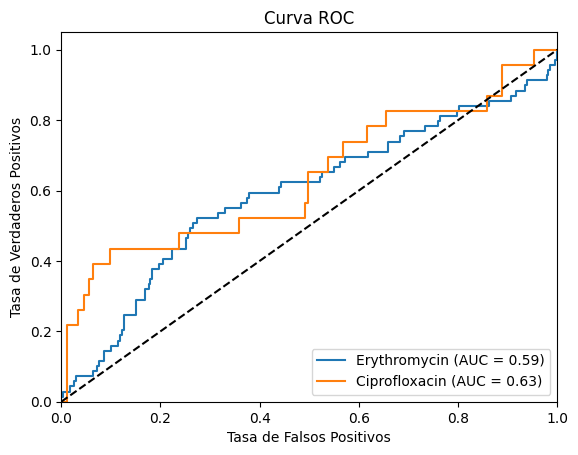

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=20)
x_train_selected = selector.fit_transform(x_train, y_train['Clase'])
x_test_selected = selector.transform(x_test)

# Entrenar regresión logística para la clase 'Erythromycin'
lr_ery = LogisticRegression(max_iter=1000, random_state=1234)
lr_ery.fit(x_train_selected, y_train['Erythromycin'])

# Entrenar regresión logística para la clase 'Ciprofloxacin'
lr_cipro = LogisticRegression(max_iter=1000, random_state=1234)
lr_cipro.fit(x_train_selected, y_train['Ciprofloxacin'])

# Obtener las probabilidades de predicción
y_pred_proba_ery = lr_ery.predict_proba(x_test_selected)[:, 1]
y_pred_proba_cipro = lr_cipro.predict_proba(x_test_selected)[:, 1]

# Calcular la curva ROC y el AUC para 'Erythromycin'
fpr_ery, tpr_ery, _ = roc_curve(y_test['Erythromycin'], y_pred_proba_ery)
roc_auc_ery = roc_auc_score(y_test['Erythromycin'], y_pred_proba_ery)

# Calcular la curva ROC y el AUC para 'Ciprofloxacin'
fpr_cipro, tpr_cipro, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_proba_cipro)
roc_auc_cipro = roc_auc_score(y_test['Ciprofloxacin'], y_pred_proba_cipro)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr_ery, tpr_ery, label=f'Erythromycin (AUC = {roc_auc_ery:.2f})')
plt.plot(fpr_cipro, tpr_cipro, label=f'Ciprofloxacin (AUC = {roc_auc_cipro:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Mejor valor de k para Erythromycin: 20
Mejor valor de k para Ciprofloxacin: 120


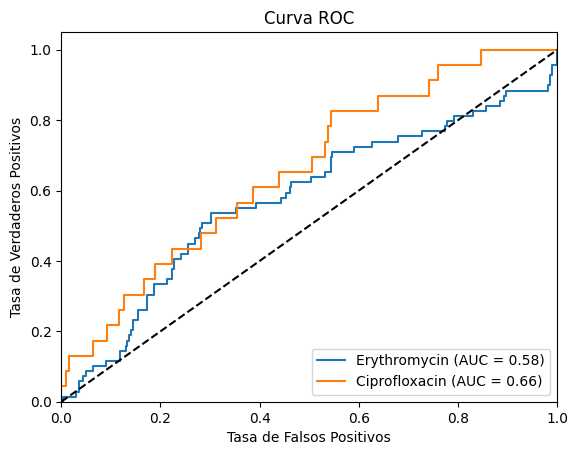

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

# Definir el rango de valores de k a probar
k_values = list(range(10, 151, 10))

# Configurar el GridSearchCV para encontrar el mejor valor de k basado en AUC para Erythromycin
param_grid_ery = {'selectkbest__k': k_values}
pipeline_ery = Pipeline([
    ('selectkbest', SelectKBest(f_classif)),
    ('logisticregression', LogisticRegression(max_iter=1000, random_state=1234))
])
grid_search_ery = GridSearchCV(estimator=pipeline_ery,
                               param_grid=param_grid_ery,
                               scoring='roc_auc',
                               cv=5)

# Ajustar el GridSearchCV a los datos para Erythromycin
grid_search_ery.fit(x_train, y_train['Erythromycin'])

# Obtener el mejor valor de k para Erythromycin
best_k_ery = grid_search_ery.best_params_['selectkbest__k']
print(f"Mejor valor de k para Erythromycin: {best_k_ery}")

# Aplicar SelectKBest con el mejor valor de k para Erythromycin
selector_ery = SelectKBest(f_classif, k=best_k_ery)
x_train_selected_ery = selector_ery.fit_transform(x_train, y_train['Erythromycin'])
x_test_selected_ery = selector_ery.transform(x_test)

# Entrenar regresión logística para la clase 'Erythromycin'
lr_ery = LogisticRegression(max_iter=1000, random_state=1234)
lr_ery.fit(x_train_selected_ery, y_train['Erythromycin'])

# Obtener las probabilidades de predicción para Erythromycin
y_pred_proba_ery = lr_ery.predict_proba(x_test_selected_ery)[:, 1]
y_pred_ery = lr_ery.predict(x_test_selected_ery)

fpr_ery, tpr_ery, _ = roc_curve(y_test['Erythromycin'], y_pred_proba_ery)
roc_auc_ery = roc_auc_score(y_test['Erythromycin'], y_pred_proba_ery)

# Configurar el GridSearchCV para encontrar el mejor valor de k basado en AUC para Ciprofloxacin
param_grid_cipro = {'selectkbest__k': k_values}
pipeline_cipro = Pipeline([
    ('selectkbest', SelectKBest(f_classif)),
    ('logisticregression', LogisticRegression(max_iter=1000, random_state=1234))
])
grid_search_cipro = GridSearchCV(estimator=pipeline_cipro,
                                 param_grid=param_grid_cipro,
                                 scoring='roc_auc',
                                 cv=5)

# Ajustar el GridSearchCV a los datos para Ciprofloxacin
grid_search_cipro.fit(x_train, y_train['Ciprofloxacin'])

# Obtener el mejor valor de k para Ciprofloxacin
best_k_cipro = grid_search_cipro.best_params_['selectkbest__k']
print(f"Mejor valor de k para Ciprofloxacin: {best_k_cipro}")

# Aplicar SelectKBest con el mejor valor de k para Ciprofloxacin
selector_cipro = SelectKBest(f_classif, k=best_k_cipro)
x_train_selected_cipro = selector_cipro.fit_transform(x_train, y_train['Ciprofloxacin'])
x_test_selected_cipro = selector_cipro.transform(x_test)

# Entrenar regresión logística para la clase 'Ciprofloxacin'
lr_cipro = LogisticRegression(max_iter=1000, random_state=1234)
lr_cipro.fit(x_train_selected_cipro, y_train['Ciprofloxacin'])

# Obtener las probabilidades de predicción para Ciprofloxacin
y_pred_proba_cipro = lr_cipro.predict_proba(x_test_selected_cipro)[:, 1]

# Calcular la curva ROC y el AUC para 'Ciprofloxacin'
fpr_cipro, tpr_cipro, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_proba_cipro)
roc_auc_cipro = roc_auc_score(y_test['Ciprofloxacin'], y_pred_proba_cipro)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr_ery, tpr_ery, label=f'Erythromycin (AUC = {roc_auc_ery:.2f})')
plt.plot(fpr_cipro, tpr_cipro, label=f'Ciprofloxacin (AUC = {roc_auc_cipro:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Mejor valor de k para Erythromycin: 10
Recall para Erythromycin: 0.00
Mejor valor de k para Ciprofloxacin: 10
Recall para Ciprofloxacin: 0.00


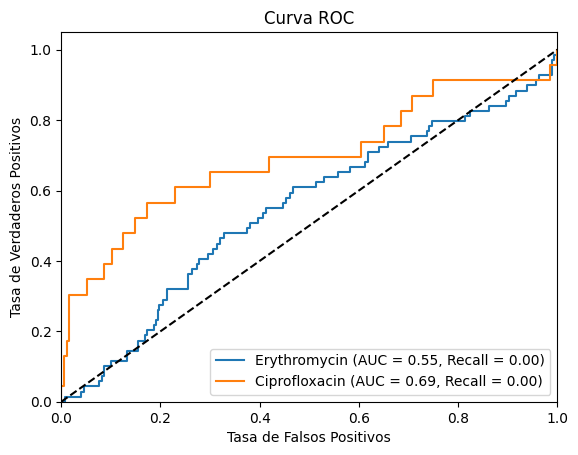

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt

# Definir el rango de valores de k a probar
k_values = list(range(10, 151, 10))

# Configurar el GridSearchCV para encontrar el mejor valor de k basado en recall para Erythromycin
param_grid_ery = {'selectkbest__k': k_values}
pipeline_ery = Pipeline([
    ('selectkbest', SelectKBest(f_classif)),
    ('logisticregression', LogisticRegression(max_iter=1000, random_state=1234))
])
grid_search_ery = GridSearchCV(estimator=pipeline_ery,
                               param_grid=param_grid_ery,
                               scoring='recall',
                               cv=5)

# Ajustar el GridSearchCV a los datos para Erythromycin
grid_search_ery.fit(x_train, y_train['Erythromycin'])

# Obtener el mejor valor de k para Erythromycin
best_k_ery = grid_search_ery.best_params_['selectkbest__k']
print(f"Mejor valor de k para Erythromycin: {best_k_ery}")

# Aplicar SelectKBest con el mejor valor de k para Erythromycin
selector_ery = SelectKBest(f_classif, k=best_k_ery)
x_train_selected_ery = selector_ery.fit_transform(x_train, y_train['Erythromycin'])
x_test_selected_ery = selector_ery.transform(x_test)

# Entrenar regresión logística para la clase 'Erythromycin'
lr_ery = LogisticRegression(max_iter=1000, random_state=1234)
lr_ery.fit(x_train_selected_ery, y_train['Erythromycin'])

# Obtener las predicciones para Erythromycin
y_pred_ery = lr_ery.predict(x_test_selected_ery)

# Calcular el recall para 'Erythromycin'
recall_ery = recall_score(y_test['Erythromycin'], y_pred_ery)
print(f"Recall para Erythromycin: {recall_ery:.2f}")

# Obtener las probabilidades de predicción para Erythromycin
y_pred_proba_ery = lr_ery.predict_proba(x_test_selected_ery)[:, 1]

# Calcular la curva ROC y el AUC para 'Erythromycin'
fpr_ery, tpr_ery, _ = roc_curve(y_test['Erythromycin'], y_pred_proba_ery)
roc_auc_ery = roc_auc_score(y_test['Erythromycin'], y_pred_proba_ery)

# Configurar el GridSearchCV para encontrar el mejor valor de k basado en recall para Ciprofloxacin
param_grid_cipro = {'selectkbest__k': k_values}
pipeline_cipro = Pipeline([
    ('selectkbest', SelectKBest(f_classif)),
    ('logisticregression', LogisticRegression(max_iter=1000, random_state=1234))
])
grid_search_cipro = GridSearchCV(estimator=pipeline_cipro,
                                 param_grid=param_grid_cipro,
                                 scoring='recall',
                                 cv=5)

# Ajustar el GridSearchCV a los datos para Ciprofloxacin
grid_search_cipro.fit(x_train, y_train['Ciprofloxacin'])

# Obtener el mejor valor de k para Ciprofloxacin
best_k_cipro = grid_search_cipro.best_params_['selectkbest__k']
print(f"Mejor valor de k para Ciprofloxacin: {best_k_cipro}")

# Aplicar SelectKBest con el mejor valor de k para Ciprofloxacin
selector_cipro = SelectKBest(f_classif, k=best_k_cipro)
x_train_selected_cipro = selector_cipro.fit_transform(x_train, y_train['Ciprofloxacin'])
x_test_selected_cipro = selector_cipro.transform(x_test)

# Entrenar regresión logística para la clase 'Ciprofloxacin'
lr_cipro = LogisticRegression(max_iter=1000, random_state=1234)
lr_cipro.fit(x_train_selected_cipro, y_train['Ciprofloxacin'])

# Obtener las predicciones para Ciprofloxacin
y_pred_cipro = lr_cipro.predict(x_test_selected_cipro)

# Calcular el recall para 'Ciprofloxacin'
recall_cipro = recall_score(y_test['Ciprofloxacin'], y_pred_cipro)
print(f"Recall para Ciprofloxacin: {recall_cipro:.2f}")

# Obtener las probabilidades de predicción para Ciprofloxacin
y_pred_proba_cipro = lr_cipro.predict_proba(x_test_selected_cipro)[:, 1]

# Calcular la curva ROC y el AUC para 'Ciprofloxacin'
fpr_cipro, tpr_cipro, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_proba_cipro)
roc_auc_cipro = roc_auc_score(y_test['Ciprofloxacin'], y_pred_proba_cipro)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr_ery, tpr_ery, label=f'Erythromycin (AUC = {roc_auc_ery:.2f}, Recall = {recall_ery:.2f})')
plt.plot(fpr_cipro, tpr_cipro, label=f'Ciprofloxacin (AUC = {roc_auc_cipro:.2f}, Recall = {recall_cipro:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Red convolucional residual

In [ ]:
import torch
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score
from imblearn.over_sampling import SMOTE

import torch.nn as nn
import torch.optim as optim

# Definir la arquitectura de la red con capas convolucionales de una dimensión y capas residuales
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size, stride, padding)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.downsample = nn.Sequential()
        if in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm1d(out_channels)
            )

    def forward(self, x):
        residual = self.downsample(x)
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual
        out = self.relu(out)
        return out

class ConvResidualNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvResidualNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True)
        )
        self.residual_block1 = ResidualBlock(64, 128, kernel_size=3, padding=1)
        self.residual_block2 = ResidualBlock(128, 256, kernel_size=3, padding=1)
        self.fc = nn.Linear(256 * 50, num_classes)  # Assuming the input length is 50

    def forward(self, x):
        out = self.layer1(x)
        out = self.residual_block1(out)
        out = self.residual_block2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train, y_train['Clase'])
x_test_selected = selector.transform(x_test)

# Convertir los datos de entrada a un formato adecuado para la red convolucional
x_train_conv = x_train_selected.reshape(x_train_selected.shape[0], 1, x_train_selected.shape[1])
x_test_conv = x_test_selected.reshape(x_test_selected.shape[0], 1, x_test_selected.shape[1])

# Convertir los datos a tensores de PyTorch
x_train_tensor = torch.tensor(x_train_conv, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train['Clase'].values, dtype=torch.long)
x_test_tensor = torch.tensor(x_test_conv, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test['Clase'].values, dtype=torch.long)

# Crear un dataset de validación a partir del dataset de entrenamiento
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_tensor, y_train_tensor, test_size=0.2, stratify=y_train_tensor, random_state=42
)

# Aplicar SMOTE para equilibrar los datos de entrenamiento
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_split.view(x_train_split.size(0), -1), y_train_split)

# Convertir los datos resampleados a tensores de PyTorch
x_train_resampled_tensor = torch.tensor(x_train_resampled.reshape(x_train_resampled.shape[0], 1, x_train_resampled.shape[1]), dtype=torch.float32)
y_train_resampled_tensor = torch.tensor(y_train_resampled, dtype=torch.long)

# Crear y entrenar el modelo
model = ConvResidualNet(num_classes=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
num_epochs = 20
batch_size = 32

train_dataset = torch.utils.data.TensorDataset(x_train_resampled_tensor, y_train_resampled_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(x_val_split, y_val_split)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

best_recall = 0.0
best_model_wts = None

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

    # Validación
    model.eval()
    val_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    val_recall = recall_score(all_labels, all_preds, average='macro')
    print(f"Validation Loss: {val_loss/len(val_loader)}, Validation Recall: {val_recall}")

    # Guardar el mejor modelo basado en el recall
    if val_recall > best_recall:
        best_recall = val_recall
        best_model_wts = model.state_dict()

# Cargar los pesos del mejor modelo
model.load_state_dict(best_model_wts)

# Evaluar el modelo
model.eval()
with torch.no_grad():
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test_tensor, predicted))

Epoch 1/20, Loss: 0.9406881496031708
Validation Loss: 13.657670021057129, Validation Recall: 0.25
Epoch 2/20, Loss: 0.4470626933273868
Validation Loss: 8.820259094238281, Validation Recall: 0.25
Epoch 3/20, Loss: 0.3397012160063904
Validation Loss: 8.687071005503336, Validation Recall: 0.25
Epoch 4/20, Loss: 0.25528386451095064
Validation Loss: 18.883532947964138, Validation Recall: 0.25
Epoch 5/20, Loss: 0.19614381642542153
Validation Loss: 6.377693388197157, Validation Recall: 0.25
Epoch 6/20, Loss: 0.16713065896879567
Validation Loss: 5.1866509384579125, Validation Recall: 0.25
Epoch 7/20, Loss: 0.17928095445663572
Validation Loss: 12.061078230539957, Validation Recall: 0.25
Epoch 8/20, Loss: 0.13351114627809446
Validation Loss: 8.30774482091268, Validation Recall: 0.25
Epoch 9/20, Loss: 0.1258918509740278
Validation Loss: 11.16090186436971, Validation Recall: 0.25
Epoch 10/20, Loss: 0.1643196315609058
Validation Loss: 6.220383538140191, Validation Recall: 0.25
Epoch 11/20, Loss: 0.

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

import torch.nn as nn
import torchvision.models as models

# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ResNet50Classifier(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Classifier, self).__init__()
        self.resnet50 = models.resnet50(pretrained=True)
        self.resnet50.fc = nn.Linear(self.resnet50.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet50(x)

    def fit(self, x_train, y_train, x_val, y_val, epochs=10, batch_size=32, learning_rate=0.001):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)

        x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
        x_val_tensor = torch.tensor(x_val, dtype=torch.float32).to(device)
        y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).to(device)

        train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        self.to(device)
        best_auc = 0.0
        best_model_wts = None

        for epoch in range(epochs):
            self.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

            # Validación
            self.eval()
            val_loss = 0.0
            all_preds = []
            all_labels = []
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = self(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, preds = torch.max(outputs, 1)
                    all_preds.extend(preds.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())
            val_auc = roc_auc_score(all_labels, all_preds, average='macro')
            print(f"Validation Loss: {val_loss/len(val_loader)}, Validation AUC: {val_auc}")

            # Guardar el mejor modelo basado en el AUC
            if val_auc > best_auc:
                best_auc = val_auc
                best_model_wts = self.state_dict()

        # Cargar los pesos del mejor modelo
        self.load_state_dict(best_model_wts)

# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train, y_train['Erythromycin'])
x_test_selected = selector.transform(x_test)

# Crear un dataset de validación a partir del dataset de entrenamiento
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_selected, y_train['Erythromycin'], test_size=0.2, stratify=y_train['Erythromycin'], random_state=42
)

# Calculate the correct shape
num_samples_train = x_train_split.shape[0]
num_samples_val = x_val_split.shape[0]
num_samples_test = x_test_selected.shape[0]

# Assuming the number of channels is 1 for grayscale images
num_channels = 1
height = 50
width = x_train_split.shape[1] // height

# Convertir los datos de entrada a un formato adecuado para ResNet50
x_train_resnet = x_train_split.reshape(num_samples_train, num_channels, height, width)
x_val_resnet = x_val_split.reshape(num_samples_val, num_channels, height, width)
x_test_resnet = x_test_selected.reshape(num_samples_test, num_channels, height, width)

# Repeat the single channel data three times to create a 3-channel input
x_train_resnet = np.repeat(x_train_resnet, 3, axis=1)
x_val_resnet = np.repeat(x_val_resnet, 3, axis=1)
x_test_resnet = np.repeat(x_test_resnet, 3, axis=1)

# Crear y entrenar el modelo ResNet50
resnet50_model = ResNet50Classifier(num_classes=2)
resnet50_model.fit(x_train_resnet, y_train_split, x_val_resnet, y_val_split, epochs=100, batch_size=32, learning_rate=0.001)

# Hacer predicciones con el modelo ResNet
x_test_resnet_tensor = torch.tensor(x_test_resnet, dtype=torch.float32).to(device)
y_pred_resnet = resnet50_model(x_test_resnet_tensor).detach().cpu().numpy()
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

# Generar el reporte de clasificación
print(classification_report(y_test['Erythromycin'], y_pred_resnet))

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/100, Loss: 0.5631670909268516
Validation Loss: 21.410828802320694, Validation AUC: 0.5
Epoch 2/100, Loss: 0.5131005704402923
Validation Loss: 0.5204443799124824, Validation AUC: 0.5
Epoch 3/100, Loss: 0.4594400329249246
Validation Loss: 0.5748043126530118, Validation AUC: 0.5963144963144963
Epoch 4/100, Loss: 0.4214897560221808
Validation Loss: 0.5195698936780294, Validation AUC: 0.5823914823914824
Epoch 5/100, Loss: 0.4933260547263282
Validation Loss: 0.5561946961614821, Validation AUC: 0.5454545454545454
Epoch 6/100, Loss: 0.49647831491061617
Validation Loss: 0.5651555988523695, Validation AUC: 0.5001638001638002
Epoch 7/100, Loss: 0.48224431361470904
Validation Loss: 0.539505809545517, Validation AUC: 0.5392710892710894
Epoch 8/100, Loss: 0.46374966076442176
Validation Loss: 0.4689255952835083, Validation AUC: 0.5181818181818182
Epoch 9/100, Loss: 0.404493476663317
Validation Loss: 0.5176761051019033, Validation AUC: 0.5181818181818182
Epoch 10/100, Loss: 0.4214772045612335


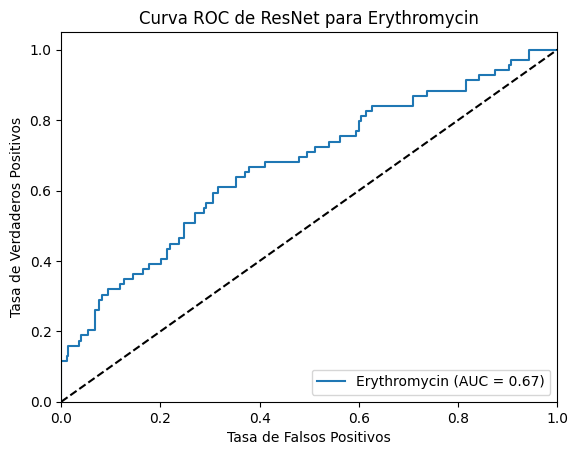

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Obtener las probabilidades de predicción del modelo ResNet
x_test_resnet_tensor = torch.tensor(x_test_resnet, dtype=torch.float32).to(device)
y_pred_resnet_proba = resnet50_model(x_test_resnet_tensor).detach().cpu().numpy()

# Calcular la curva ROC y el AUC para la clase "Erythromycin"
fpr, tpr, _ = roc_curve(y_test['Erythromycin'], y_pred_resnet_proba[:, 1])
roc_auc = roc_auc_score(y_test['Erythromycin'], y_pred_resnet_proba[:, 1])

# Plotear la curva ROC para "Erythromycin"
plt.figure()
plt.plot(fpr, tpr, label=f'Erythromycin (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de ResNet para Erythromycin')
plt.legend(loc='lower right')
plt.show()


Usando otro selector de características

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

import torch.nn as nn
import torchvision.models as models

# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ResNet50Classifier(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Classifier, self).__init__()
        self.resnet50 = models.resnet50(pretrained=True)
        self.resnet50.fc = nn.Linear(self.resnet50.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet50(x)

    def fit(self, x_train, y_train, x_val, y_val, epochs=10, batch_size=32, learning_rate=0.001):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)

        x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
        x_val_tensor = torch.tensor(x_val, dtype=torch.float32).to(device)
        y_val_tensor = torch.tensor(y_val.values, dtype=torch.long).to(device)

        train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        self.to(device)
        best_auc = 0.0
        best_model_wts = None

        for epoch in range(epochs):
            self.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

            # Validación
            self.eval()
            val_loss = 0.0
            all_preds = []
            all_labels = []
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = self(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, preds = torch.max(outputs, 1)
                    all_preds.extend(preds.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())
            val_auc = roc_auc_score(all_labels, all_preds, average='macro')
            print(f"Validation Loss: {val_loss/len(val_loader)}, Validation AUC: {val_auc}")

            # Guardar el mejor modelo basado en el AUC
            if val_auc > best_auc:
                best_auc = val_auc
                best_model_wts = self.state_dict()

        # Cargar los pesos del mejor modelo
        self.load_state_dict(best_model_wts)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote_selector = smote.fit_resample(x_train, y_train['Erythromycin'])

# Se aplican las transformaciones a los datos
lasso_smote = Lasso(alpha=0.0001).fit(x_train_smote, y_train_smote_selector)
selector_smote = SelectFromModel(lasso_smote, prefit=True)
x_train_lasso_smote = selector_smote.transform(x_train_smote)
x_train_lasso_smote, y_train_smote_lasso = smote.fit_resample(x_train_lasso_smote, y_train_smote_selector)

# Aplicar las mismas transformaciones al conjunto de prueba
x_test_lasso_smote = selector_smote.transform(x_test)

# Crear un dataset de validación a partir del dataset de entrenamiento
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_selected, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42
)

# Calculate the correct shape
num_samples_train = x_train_split.shape[0]
num_samples_val = x_val_split.shape[0]
num_samples_test = x_test_selected.shape[0]

# Assuming the number of channels is 1 for grayscale images
num_channels = 1
height = 50
width = x_train_split.shape[1] // height

# Convertir los datos de entrada a un formato adecuado para ResNet50
x_train_resnet = x_train_split.reshape(num_samples_train, num_channels, height, width)
x_val_resnet = x_val_split.reshape(num_samples_val, num_channels, height, width)
x_test_resnet = x_test_selected.reshape(num_samples_test, num_channels, height, width)

# Repeat the single channel data three times to create a 3-channel input
x_train_resnet = np.repeat(x_train_resnet, 3, axis=1)
x_val_resnet = np.repeat(x_val_resnet, 3, axis=1)
x_test_resnet = np.repeat(x_test_resnet, 3, axis=1)

# Crear y entrenar el modelo ResNet50
resnet50_model = ResNet50Classifier(num_classes=2)
resnet50_model.fit(x_train_resnet, y_train_split, x_val_resnet, y_val_split, epochs=100, batch_size=32, learning_rate=0.001)

# Hacer predicciones con el modelo ResNet
x_test_resnet_tensor = torch.tensor(x_test_resnet, dtype=torch.float32).to(device)
y_pred_resnet = resnet50_model(x_test_resnet_tensor).detach().cpu().numpy()
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

# Generar el reporte de clasificación
print(classification_report(y_test['Erythromycin'], y_pred_resnet))

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1384, 3396]

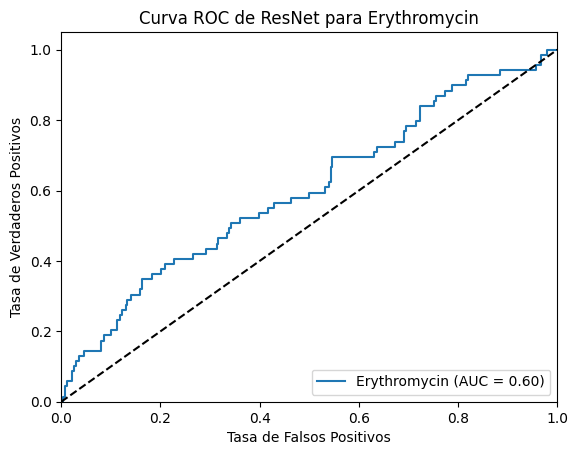

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Obtener las probabilidades de predicción del modelo ResNet
x_test_resnet_tensor = torch.tensor(x_test_resnet, dtype=torch.float32).to(device)
y_pred_resnet_proba = resnet50_model(x_test_resnet_tensor).detach().cpu().numpy()

# Calcular la curva ROC y el AUC para la clase "Erythromycin"
fpr, tpr, _ = roc_curve(y_test['Erythromycin'], y_pred_resnet_proba[:, 1])
roc_auc = roc_auc_score(y_test['Erythromycin'], y_pred_resnet_proba[:, 1])

# Plotear la curva ROC para "Erythromycin"
plt.figure()
plt.plot(fpr, tpr, label=f'Erythromycin (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de ResNet para Erythromycin')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_selection import SelectKBest, f_classif

import torch.nn as nn
import torchvision.models as models

# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ResNet50Classifier(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50Classifier, self).__init__()
        self.resnet50 = models.resnet50(pretrained=True)
        self.resnet50.fc = nn.Linear(self.resnet50.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet50(x)

    def fit(self, x_train, y_train, epochs=10, batch_size=32, learning_rate=0.001):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)

        x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)

        train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        self.to(device)
        for epoch in range(epochs):
            self.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

# Aplicar SelectKBest para reducir el número de atributos a 50
selector = SelectKBest(f_classif, k=50)
x_train_selected = selector.fit_transform(x_train, y_train['Ciprofloxacin'])
x_test_selected = selector.transform(x_test)

# Calculate the correct shape
num_samples_train = x_train_selected.shape[0]
num_samples_test = x_test_selected.shape[0]

# Assuming the number of channels is 1 for grayscale images
num_channels = 1
height = 50
width = x_train_selected.shape[1] // height

# Convertir los datos de entrada a un formato adecuado para ResNet50
x_train_resnet = x_train_selected.reshape(num_samples_train, num_channels, height, width)
x_test_resnet = x_test_selected.reshape(num_samples_test, num_channels, height, width)

# Repeat the single channel data three times to create a 3-channel input
x_train_resnet = np.repeat(x_train_resnet, 3, axis=1)
x_test_resnet = np.repeat(x_test_resnet, 3, axis=1)

# Crear y entrenar el modelo ResNet50
resnet50_model = ResNet50Classifier(num_classes=2)
resnet50_model.fit(x_train_resnet, y_train['Ciprofloxacin'].values, epochs=10, batch_size=32, learning_rate=0.001)

# Hacer predicciones con el modelo ResNet
x_test_resnet_tensor = torch.tensor(x_test_resnet, dtype=torch.float32).to(device)
y_pred_resnet = resnet50_model(x_test_resnet_tensor).detach().cpu().numpy()
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)

# Generar el reporte de clasificación
print(classification_report(y_test['Ciprofloxacin'], y_pred_resnet))

C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.3438227371397344
Epoch 2/10, Loss: 0.23822317344390534
Epoch 3/10, Loss: 0.24829943926835601
Epoch 4/10, Loss: 0.28953322099352424
Epoch 5/10, Loss: 0.24677293519066137
Epoch 6/10, Loss: 0.287058339073238
Epoch 7/10, Loss: 0.2252977487885139
Epoch 8/10, Loss: 0.21603409137407487
Epoch 9/10, Loss: 0.21746932816776363
Epoch 10/10, Loss: 0.19904986963692037
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       324
         1.0       1.00      0.13      0.23        23

    accuracy                           0.94       347
   macro avg       0.97      0.57      0.60       347
weighted avg       0.95      0.94      0.92       347



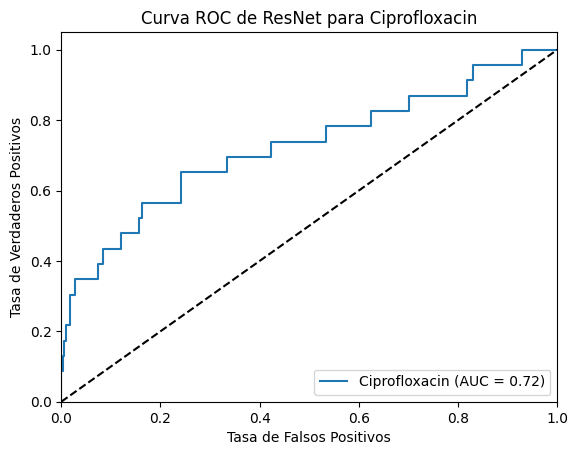

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Obtener las probabilidades de predicción del modelo ResNet
x_test_resnet_tensor = torch.tensor(x_test_resnet, dtype=torch.float32).to(device)
y_pred_resnet_proba = resnet50_model(x_test_resnet_tensor).detach().cpu().numpy()

# Calcular la curva ROC y el AUC para la clase "Erythromycin"
fpr, tpr, _ = roc_curve(y_test['Ciprofloxacin'], y_pred_resnet_proba[:, 1])
roc_auc = roc_auc_score(y_test['Ciprofloxacin'], y_pred_resnet_proba[:, 1])

# Plotear la curva ROC para "Erythromycin"
plt.figure()
plt.plot(fpr, tpr, label=f'Ciprofloxacin (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de ResNet para Ciprofloxacin')
plt.legend(loc='lower right')
plt.show()


### UNIFICADO

#### Sin Pesos

In [ ]:
# Training Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=1234)
lr.fit(x_train_pca, y_train['Clase'])

# Predicting on the test set
y_pred_sw = lr.predict(x_test_pca)

NameError: name 'x_train_pca' is not defined

#### Con Pesos

In [ ]:
# class_counts = (df['Clase'].value_counts())
# print("Registros por clase: ",class_counts)
# total_samples = np.sum(class_counts)
# print("Total registros: ",total_samples)

# # Calcular los pesos inversamente proporcionales a la frecuencia
# weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# print(weights)

# Training Logistic Regression model for
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1234)
lr.fit(x_train_pca, y_train['Clase'])

# Predicting on the test set
y_pred_cw = lr.predict(x_test_pca)

#### Comparación

In [ ]:
# Evaluating the model sin pesos
from sklearn.metrics import roc_auc_score, roc_curve
accuracy = accuracy_score(y_test['Clase'], y_pred_sw)
print(f"Accuracy of Logistic Regression model sin pesos: {accuracy:.2f}")
print(classification_report(y_test['Clase'], y_pred_sw))

# Evaluating the model con pesos
accuracy = accuracy_score(y_test['Clase'], y_pred_cw)
print(f"Accuracy of Logistic Regression model con pesos: {accuracy:.2f}")
print(classification_report(y_test['Clase'], y_pred_cw))
auc_score = roc_auc_score(y_test['Clase'], y_pred_cw, multi_class='ovo')
print(f"AUC-ROC: {auc_score:.4f}")


Accuracy of Logistic Regression model sin pesos: 0.25
              precision    recall  f1-score   support

         0.0       0.82      0.12      0.21       266
         1.0       0.18      0.83      0.30        58
         2.0       0.08      0.17      0.11        12
         3.0       0.25      0.45      0.32        11

    accuracy                           0.25       347
   macro avg       0.33      0.39      0.24       347
weighted avg       0.67      0.25      0.22       347

Accuracy of Logistic Regression model con pesos: 0.25
              precision    recall  f1-score   support

         0.0       0.82      0.12      0.21       266
         1.0       0.18      0.83      0.30        58
         2.0       0.08      0.17      0.11        12
         3.0       0.25      0.45      0.32        11

    accuracy                           0.25       347
   macro avg       0.33      0.39      0.24       347
weighted avg       0.67      0.25      0.22       347



AxisError: axis 1 is out of bounds for array of dimension 1

### DIVIDIDO

#### Erythromycin

##### Sin Pesos

In [ ]:
# Training Logistic Regression model for 'Erythromycin'
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(x_train_pca, y_train['Erythromycin'])

# Predicting on the test set
y_pred_Erythromycin_sw = lr.predict(x_test_pca)

##### Con Pesos

In [ ]:
# Training Logistic Regression model for 'Erythromycin'
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0)
lr.fit(x_train_pca, y_train['Erythromycin'])

# Predicting on the test set
y_pred_Erythromycin_cw = lr.predict(x_test_pca)

##### Comparativa

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test['Erythromycin'], y_pred_Erythromycin_sw)
print(f"Accuracy of Logistic Regression model Sin Pesos: {accuracy:.2f}")
print(classification_report(y_test['Erythromycin'], y_pred_Erythromycin_sw))

# Evaluating the model
accuracy = accuracy_score(y_test['Erythromycin'], y_pred_Erythromycin_cw)
print(f"Accuracy of Logistic Regression model Con Pesos: {accuracy:.2f}")
print(classification_report(y_test['Erythromycin'], y_pred_Erythromycin_cw))

Accuracy of Logistic Regression model Sin Pesos: 0.80
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       278
         1.0       0.45      0.13      0.20        69

    accuracy                           0.80       347
   macro avg       0.63      0.55      0.54       347
weighted avg       0.74      0.80      0.75       347

Accuracy of Logistic Regression model Con Pesos: 0.80
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       278
         1.0       0.45      0.13      0.20        69

    accuracy                           0.80       347
   macro avg       0.63      0.55      0.54       347
weighted avg       0.74      0.80      0.75       347



#### Ciprofloxacin

Sin Pesos

In [ ]:
# Training Logistic Regression model for 'Ciprofloxacin'
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(x_train_pca, y_train['Ciprofloxacin'])

# Predicting on the test set
y_pred_Ciprofloxacin_sw = lr.predict(x_test_pca)

##### Con Pesos

In [ ]:
# Training Logistic Regression model for 'Ciprofloxacin'
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0)
lr.fit(x_train_pca, y_train['Ciprofloxacin'])

# Predicting on the test set
y_pred_Ciprofloxacin_cw = lr.predict(x_test_pca)

##### Comparativa

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test['Ciprofloxacin'], y_pred_Ciprofloxacin_sw)
print(f"Accuracy of Logistic Regression model Sin Pesos: {accuracy:.2f}")
print(classification_report(y_test['Ciprofloxacin'], y_pred_Ciprofloxacin_sw))

# Evaluating the model
accuracy = accuracy_score(y_test['Ciprofloxacin'], y_pred_Ciprofloxacin_cw)
print(f"Accuracy of Logistic Regression model Con Pesos: {accuracy:.2f}")
print(classification_report(y_test['Ciprofloxacin'], y_pred_Ciprofloxacin_cw))

Accuracy of Logistic Regression model Sin Pesos: 0.86
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       324
         1.0       0.23      0.43      0.30        23

    accuracy                           0.86       347
   macro avg       0.59      0.66      0.61       347
weighted avg       0.91      0.86      0.88       347

Accuracy of Logistic Regression model Con Pesos: 0.86
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       324
         1.0       0.23      0.43      0.30        23

    accuracy                           0.86       347
   macro avg       0.59      0.66      0.61       347
weighted avg       0.91      0.86      0.88       347



### COMPARISON

In [ ]:
# Unifico las predicciones
pred_unified_sw = []
for e,c in zip(y_pred_Erythromycin_sw, y_pred_Ciprofloxacin_sw):
  if e == 1 and c == 1:
    pred_unified_sw.append(3)
  elif e == 1 and c == 0:
    pred_unified_sw.append(1)
  elif e == 0 and c == 1:
    pred_unified_sw.append(2)
  else:
    pred_unified_sw.append(0)


# Unifico las predicciones
pred_unified_cw = []
for e,c in zip(y_pred_Erythromycin_cw, y_pred_Ciprofloxacin_cw):
  if e == 1 and c == 1:
    pred_unified_cw.append(3)
  elif e == 1 and c == 0:
    pred_unified_cw.append(2)
  elif e == 0 and c == 1:
    pred_unified_cw.append(1)
  else:
    pred_unified_cw.append(0)

In [ ]:
## COMPARISON
# Evaluating the model separated
accuracy = accuracy_score(y_test['Clase'], pred_unified_sw)
print(f"Accuracy of Logistic Regression model Dividido Sin Pesos: {accuracy:.2f}")
print(classification_report(y_test['Clase'], pred_unified_sw))

# Evaluating the model joined
accuracy = accuracy_score(y_test['Clase'], y_pred_sw)
print(f"Accuracy of Logistic Regression model Unificado Sin Pesos: {accuracy:.2f}")
print(classification_report(y_test['Clase'], y_pred_sw))

Accuracy of Logistic Regression model Dividido Sin Pesos: 0.70
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       266
         1.0       0.00      0.00      0.00        58
         2.0       0.08      0.17      0.11        12
         3.0       0.25      0.45      0.32        11

    accuracy                           0.70       347
   macro avg       0.28      0.38      0.32       347
weighted avg       0.61      0.70      0.65       347

Accuracy of Logistic Regression model Unificado Sin Pesos: 0.25
              precision    recall  f1-score   support

         0.0       0.82      0.12      0.21       266
         1.0       0.18      0.83      0.30        58
         2.0       0.08      0.17      0.11        12
         3.0       0.25      0.45      0.32        11

    accuracy                           0.25       347
   macro avg       0.33      0.39      0.24       347
weighted avg       0.67      0.25      0.22       347



C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_pca, y_train['Clase'])
y_pred_knn = neigh.predict(x_test_pca)


In [ ]:
accuracy = accuracy_score(y_test['Clase'], y_pred_knn)
print(f"Accuracy of KNN: {accuracy:.2f}")
print(classification_report(y_test['Clase'], y_pred_knn))

Accuracy of KNN: 0.67
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       266
         1.0       0.12      0.03      0.05        58
         2.0       0.04      0.08      0.06        12
         3.0       0.21      0.27      0.24        11

    accuracy                           0.67       347
   macro avg       0.29      0.31      0.29       347
weighted avg       0.62      0.67      0.64       347



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Crear el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, class_weight='balanced', min_samples_split=5, min_samples_leaf=2, random_state=42)

# Entrenar el modelo
rf_classifier.fit(x_train_pca, y_train['Ciprofloxacin'])

# Definir los parámetros que queremos probar
param_dist = {
    'n_estimators': [70, 100, 150, 200],
    'max_depth': [10, 20, 25],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Crear el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Configurar la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Entrenar el modelo con la búsqueda de hiperparámetros
random_search.fit(x_train_pca, y_train['Ciprofloxacin'])

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Crear el clasificador Random Forest con los mejores hiperparámetros
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con los mejores hiperparámetros
rf_classifier.fit(x_train_pca, y_train['Ciprofloxacin'])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_depth': 10}


RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = rf_classifier.predict(x_test_pca)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test['Ciprofloxacin'], y_pred_rf)
print(f"Accuracy of RF: {accuracy:.2f}")
print(classification_report(y_test['Ciprofloxacin'], y_pred_rf))


Accuracy of RF: 0.88
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       324
         1.0       0.27      0.43      0.33        23

    accuracy                           0.88       347
   macro avg       0.61      0.68      0.64       347
weighted avg       0.91      0.88      0.90       347



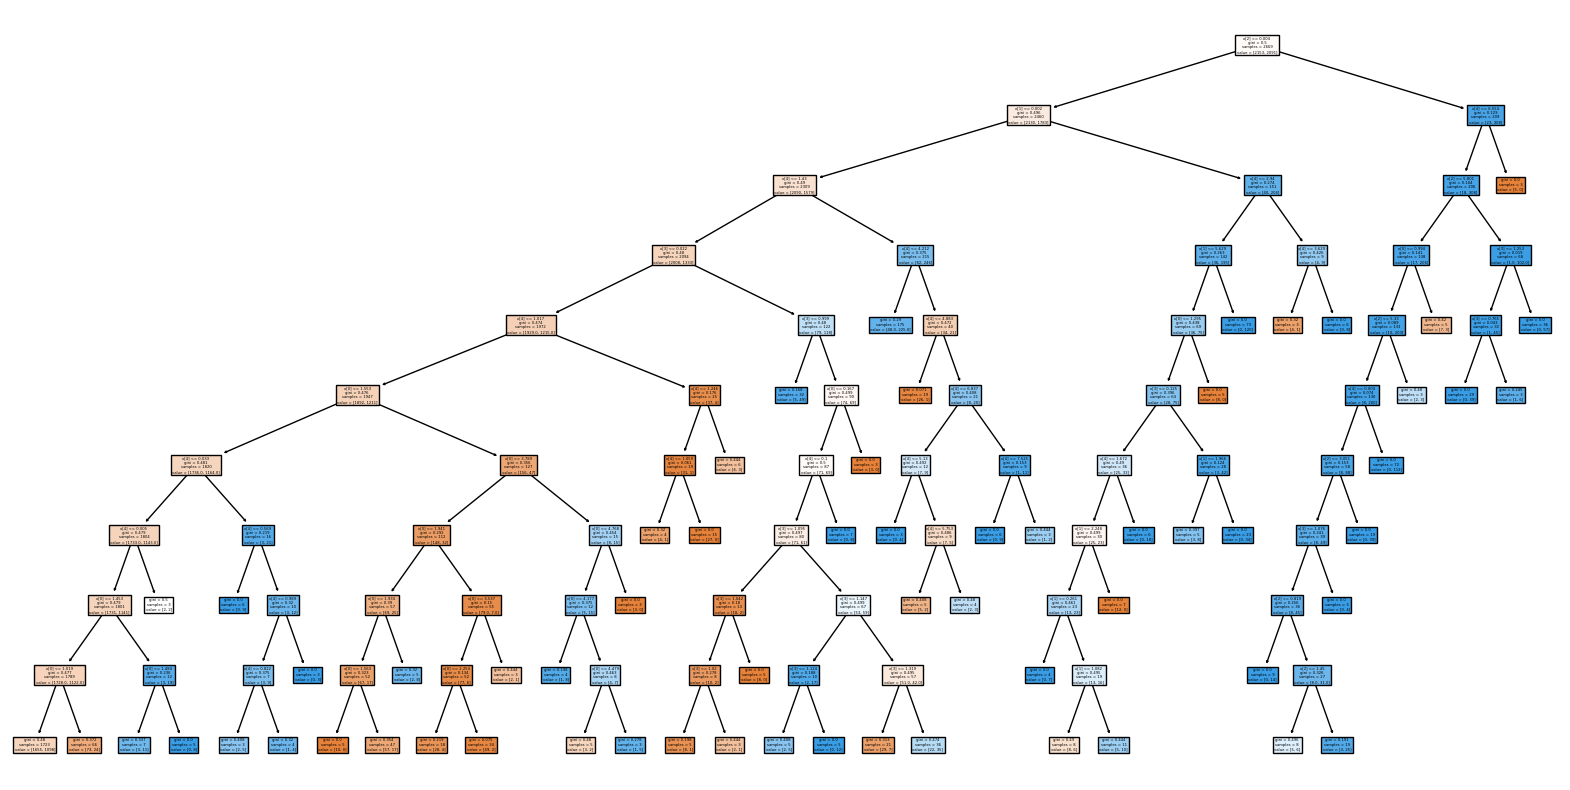

In [ ]:
from sklearn.tree import plot_tree

# Visualizar el primer árbol del modelo
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], filled=True)
plt.show()


In [ ]:
# Crear el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=20, class_weight='balanced', min_samples_split=5, min_samples_leaf=2, random_state=42)

# Entrenar el modelo
rf_classifier.fit(x_train_pca, y_train['Erythromycin'])

# Definir los parámetros que queremos probar
param_dist = {
    'n_estimators': [70, 100, 150, 200],
    'max_depth': [10, 20, 25],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Crear el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Configurar la búsqueda de hiperparámetros
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Entrenar el modelo con la búsqueda de hiperparámetros
random_search.fit(x_train_pca, y_train['Erythromycin'])

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Crear el clasificador Random Forest con los mejores hiperparámetros
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con los mejores hiperparámetros
rf_classifier.fit(x_train_pca, y_train['Erythromycin'])


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'n_estimators': 70, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 10}


RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=70,
                       random_state=42)

In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred_rf = rf_classifier.predict(x_test_pca)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test['Erythromycin'], y_pred_rf)
print(f"Accuracy of RF: {accuracy:.2f}")
print(classification_report(y_test['Erythromycin'], y_pred_rf))


Accuracy of RF: 0.31
              precision    recall  f1-score   support

         0.0       0.86      0.16      0.27       278
         1.0       0.21      0.90      0.34        69

    accuracy                           0.31       347
   macro avg       0.54      0.53      0.30       347
weighted avg       0.73      0.31      0.28       347



In [ ]:
import torch
import torch.nn as nn
class BasicMLP(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(BasicMLP, self).__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = nn.ReLU(self.fc1(x))
    x = self.fc2(x)
    return
  
  def fit(self, x, y):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(self.parameters(), lr=0.01)

    for epoch in range(100):
      optimizer.zero_grad()
      outputs = self(x)
      loss = criterion(outputs, y)
      loss.backward()
      optimizer.step()
  
  
mlp = BasicMLP(input_dim=x_train_pca.shape[1], hidden_dim=100, output_dim=4)
mlp.fit(x_train_pca, y_train['Clase'])

TypeError: linear(): argument 'input' (position 1) must be Tensor, not numpy.ndarray